<a href="https://colab.research.google.com/github/4OH4/seq2seq/blob/master/univariate_seq2seq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Univariate time-series analysis

Ref:
https://weiminwang.blog/2017/09/29/multivariate-time-series-forecast-using-seq2seq-in-tensorflow/#outlier
https://github.com/aaxwaz/Multivariate-Time-Series-forecast-using-seq2seq-in-TensorFlow

In [0]:
%tensorflow_version 1.x

import random
import math
import os
import copy

import tensorflow as tf
import numpy as np 
from matplotlib import pyplot as plt

In [7]:
!git clone https://github.com/aaxwaz/Multivariate-Time-Series-forecast-using-seq2seq-in-TensorFlow aaxwax

Cloning into 'aaxwax'...
remote: Enumerating objects: 51, done.
remote: Total 51 (delta 0), reused 0 (delta 0), pack-reused 51
Unpacking objects: 100% (51/51), done.


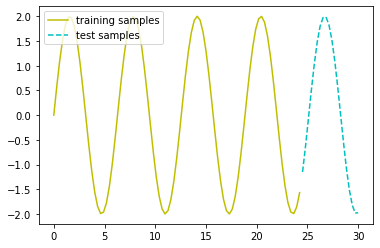

In [2]:
x = np.linspace(0, 30, 105)
y = 2 * np.sin(x)

l1, = plt.plot(x[:85], y[:85], 'y', label = 'training samples')
l2, = plt.plot(x[85:], y[85:105], 'c--', label = 'test samples')
plt.legend(handles = [l1, l2], loc = 'upper left')
plt.show()

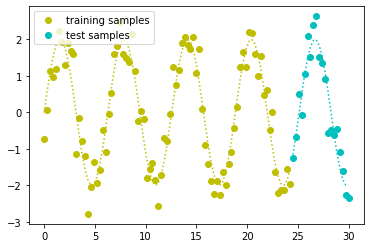

In [3]:
# Add noise
train_y = y.copy()

noise_factor = 0.5
train_y += np.random.randn(105) * noise_factor

l1, = plt.plot(x[:85], train_y[:85], 'yo', label = 'training samples')
plt.plot(x[:85], y[:85], 'y:')
l2, = plt.plot(x[85:], train_y[85:], 'co', label = 'test samples')
plt.plot(x[85:], y[85:], 'c:')
plt.legend(handles = [l1, l2], loc = 'upper left')
plt.show()

In [0]:
# Generate training samples
input_seq_len = 15
output_seq_len = 20

x = np.linspace(0, 30, 105)
train_data_x = x[:85]

def true_signal(x):
    y = 2 * np.sin(x)
    return y

def noise_func(x, noise_factor = 1):
    return np.random.randn(len(x)) * noise_factor

def generate_y_values(x):
    return true_signal(x) + noise_func(x)

def generate_train_samples(x = train_data_x, batch_size = 10, input_seq_len = input_seq_len, output_seq_len = output_seq_len):

    total_start_points = len(x) - input_seq_len - output_seq_len
    start_x_idx = np.random.choice(range(total_start_points), batch_size)
    
    input_seq_x = [x[i:(i+input_seq_len)] for i in start_x_idx]
    output_seq_x = [x[(i+input_seq_len):(i+input_seq_len+output_seq_len)] for i in start_x_idx]
    
    input_seq_y = [generate_y_values(x) for x in input_seq_x]
    output_seq_y = [generate_y_values(x) for x in output_seq_x]
    
    #batch_x = np.array([[true_signal()]])
    return np.array(input_seq_y), np.array(output_seq_y)

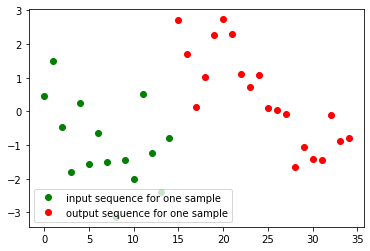

In [5]:
input_seq, output_seq = generate_train_samples(batch_size=10)

l1, = plt.plot(range(15), input_seq[1], 'go', label = 'input sequence for one sample')
l2, = plt.plot(range(15, 35), output_seq[1], 'ro', label = 'output sequence for one sample')
plt.legend(handles = [l1, l2], loc = 'lower left')
plt.show()

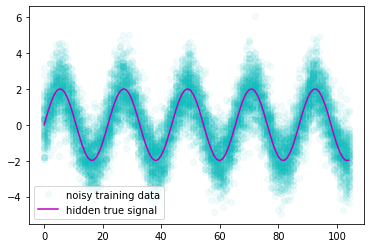

In [6]:
results = []
for i in range(100):
    temp = generate_y_values(x)
    results.append(temp)
results = np.array(results)

for i in range(100):
    l1, = plt.plot(results[i].reshape(105, -1), 'co', lw = 0.1, alpha = 0.05, label = 'noisy training data')

l2, = plt.plot(true_signal(x), 'm', label = 'hidden true signal')
plt.legend(handles = [l1, l2], loc = 'lower left')
plt.show()